#  Heaps (6.1)
## Formal characteristics
- Attributes
    - length (size of the array)
    - heap-size (size of the subarray that are in a heap; can be 0)

- Properties of all heaps
    - $A[i].parent$ = $A[\lfloor i/2 \rfloor]$
    - $A[i].leftChild$ = $A[i*2]$
    - $A[i].rightChild$ = $A[i*2 + 1]$
    - Viewed as a tree
        - The height of a node in a heap is the number of edges on the longest simple downward path from the node to a leaf
        ```
              1               height = 3
            /   \
           2     8            height = 2
          / \   / \
         3   4  9  10         height = 1
        ```

- Properties of `min-heaps`
    - *min heap property*: $A[i].parent \leq A[i]$

- Properties of `max-heaps`
    - *max heap property*: $A[i].parent \geq A[i]$

- Procedures
    - $Max\-Heapify$
        - Time complexity: $O(\lg n)$
        - Maintains the max-heap property
    - $BuildMaxHeap$
        - Time complexity: $O(n)$
        - Converts any array to a max-heap
    - $Heapsort$
        - Time complexity: $O(n \lg n)$
        - Sorts an array in place 
    - Priority queue procedures:
        - $MaxHeapInsert$
            - Time complexity: $O(\lg n)$
        - $HeapExtractMax$
            - Time complexity: $O(\lg n)$
        - $HeapIncreaseKey$
            - Time complexity: $O(\lg n)$
        - $HeapMaximum$
            - Time complexity: $O(\lg n)$

## Usage
- min heaps: priority queues
- max heaps: heapsort

## Excercises 
### Min/max cardinality of heap of height $h$ (6.1-1)
- max: $2^h - 1$
- min: $2^{h-1} + 1$

### Show that an $n$-element heap has a height of $\lfloor \lg n \rfloor$ (6.1-2)
1. $text{Base case}$: a 0-element heap trivially has a height of $\lfloor \lg n \rfloor$
2. $text{Inductive hypothesis (IH)}$: $n$-element heap has a height of $\lfloor \lg n \rfloor$
3. $text{Induction steps}$
    1. Let us assume $IH$ holds for $n$, and prove it for $n+1$.
    2. A parent node may have a maximum of 2 children
    3. We know that a min-heap like `[1,2,3]` has a height of 1 ($\lg 2$), because the maximum number of edges between the root node and a leaf is 1
    4. We know that a min-heap like `[1,2]` has a height of 1 ($\lg 2$), because the maximum number of edges between the root node and a leaf is 1
    5. We know that a min-heap like `[1]` has a height of 0 ($\lg 1$)
    6. We observe that this pattern would fan out across all children in the range of $2^i..2^{i+1}$
    7. $\therefore$ we know that an $n$-element heap has a height of $\lfloor \lg n \rfloor$
       $QED$

In [1]:
from graphviz import Digraph

def visualize_heap(heap_array, title="Heap Visualization"):
    """
    Visualizes a binary heap from its array representation using Graphviz.

    Args:
        heap_array (list): A list representing the heap in its array notation.
        title (str): The title for the visualization.
    """
    if not heap_array:
        print("Heap is empty.")
        return

    dot = Digraph(comment=title, node_attr={'shape': 'circle'})

    for i, value in enumerate(heap_array):
        # Add a node for each element in the heap
        dot.node(str(i), str(value))
        
        # Calculate parent index
        parent_index = (i - 1) // 2
        
        # Add an edge from the parent to the current node (except for the root)
        if i > 0:
            dot.edge(str(parent_index), str(i))

    return dot

### Where in a max heap might the smallest element reside (6.1-4)
Assuming elements are distinct, and that the heap is balanced, the smallest element might be an element in the last $x$ elements of the heap, where $x = 2^{(\lfloor \lg n\rfloor)}$ ... but consider `[16,4,10,14,7,9,1,3,8,2]`

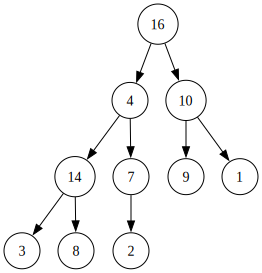

In [2]:
visualize_heap([16,4,10,14,7,9,1,3,8,2])

Mabye the right definition is `the minimum value will always be a leaf`